In [47]:
from keras.models import load_model
import numpy as np
import GPy
import GPyOpt
import pandas as pd

def IE_predictor(z):
    predictor = load_model("./MP_prop_pred.h5")
    return predictor.predict(z)


ls = np.load("./latenspace_MP_zinc_test.npy")
df_ls = pd.DataFrame(ls)
df_ls_distribution = df_ls.describe()
ls_range = df_ls_distribution.loc[["min","max"],:]
bounds=[{'name': 'var_'+str(i+1), 'type': 'continuous', 'domain': (ls_range[i][0],ls_range[i][1])} for i in range(196)]


max_iter= 1000

myProblem = GPyOpt.methods.BayesianOptimization(IE_predictor,bounds)
myProblem.run_optimization(max_iter)
print(myProblem.x_opt)
print(myProblem.fx_opt)

[-0.55167586 -0.01033426 -0.55014771  0.07047508 -0.01298856 -0.08705733
 -0.49428671 -0.12752029 -0.50219953 -0.43024092 -0.17819215  0.14690491
  0.08127541  0.28480428  0.42867935  0.2303928   0.46494806  0.05559768
  0.32951103 -0.3133421   0.42880783 -0.26776605 -0.24879839  0.12174869
  0.4256936   0.551965   -0.60292179 -0.14901559  0.48082837  0.15911378
 -0.50319474  0.58289597 -0.5279094  -0.263027    0.21658923 -0.54636472
  0.60984135 -0.32293908  0.02024917 -0.49871435 -0.27286327  0.22391281
  0.49736971  0.05088608 -0.01928307  0.4683553  -0.09023943 -0.24628495
 -0.53918571 -0.08774195  0.52529645  0.04307465  0.35384258 -0.43568352
 -0.00212678  0.2191191   0.15146422  0.17721356 -0.52593642  0.13483697
  0.15752198 -0.11795905 -0.33433029  0.22964081 -0.54255998  0.58601445
  0.59964591  0.08173454  0.49285295 -0.41606683  0.16436074  0.4829586
 -0.06111105  0.05457886  0.51031512  0.28259738 -0.46779309  0.55111086
 -0.1484543   0.34215226  0.48144495  0.26655093  0.

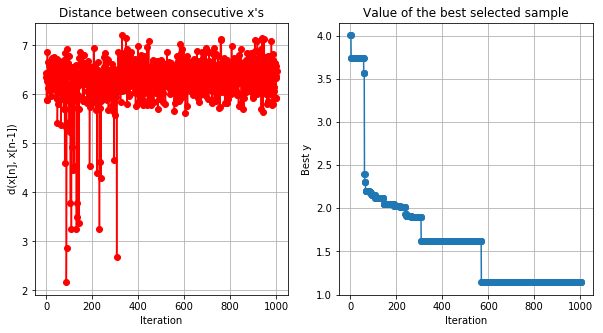

In [48]:
myProblem.plot_convergence()
# myProblem.plot_acquisition()

In [49]:
c = np.reshape(myProblem.x_opt,(1,196))

IE_predictor(c)

array([[1.1404496]], dtype=float32)